# Visualizing networks using NetworkX and Community Detection Algorithms

Note: Using networkx is reading in the networks as undirected, so directionality is lost in this code.

In [1]:
import matplotlib.pyplot as plt
from bb_utils import *
import booleabayes as bb
import networkx as nx
import leidenalg as la
from kitchen import net as knet


Bad key "text.kerning_factor" on line 4 in
/Users/smgroves/Documents/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Updated network with new JASPAR2020 database (without filtering on DIRECT-NET)

In [2]:
remove_sinks=False
remove_selfloops=False
remove_sources=False
dir_prefix = '/Users/smgroves/Documents/GitHub/multiome-analysis/network-inference-DIRECT-NET'

In [2]:

network_path = 'networks/DIRECT-NET_network_threshold_10_2020db.csv'

G = knet.load_nx_network(f"{dir_prefix}/{network_path}")
knet.get_graph_info(G)

Number of nodes: 75
Number of edges: 1772
Available nodes: ['ZBTB18', 'NPAS2', 'STAT1', 'SP100', 'FOXO3', 'AHR', 'RARB', 'THRB', 'GRHL2', 'EHF', 'NFKB1', 'NFIB', 'NFIA', 'PRDM16', 'CUX1', 'TCF7L1', 'TEAD1', 'SMAD3', 'ASCL1', 'SOX11', 'SIX4', 'ZBTB20', 'BBX', 'LCOR', 'CUX2', 'PKNOX2', 'NCAM1', 'TCF12', 'PBX1', 'HIF1A', 'PPARG', 'ETS1', 'KMT2A', 'TRPS1', 'ZEB1', 'EGR1', 'RORB', 'LMX1B', 'MEIS2', 'NFATC2', 'TBX15', 'ESR1', 'STAT2', 'FOS', 'HES1', 'BACH1', 'EPAS1', 'GLIS3', 'NFE2L2', 'BACH2', 'JUN', 'FOSB', 'ICAM1', 'CD24A', 'EPCAM', 'NR3C2', 'NFIX', 'RUNX1', 'TCF7L2', 'REST', 'SOX5', 'CREB1', 'PROX1', 'HSF2', 'SIX1', 'SOX6', 'JUNB', 'SOX9', 'RORA', 'JUND', 'TFDP1', 'TCF4', 'RBPJ', 'NFYC', 'NR6A1']
Connected components: [{'FOSB', 'ZBTB20', 'ICAM1', 'THRB', 'EHF', 'TCF7L1', 'SMAD3', 'RORB', 'NFATC2', 'TCF7L2', 'HSF2', 'SIX4', 'JUNB', 'NR6A1', 'CUX2', 'RBPJ', 'TBX15', 'NCAM1', 'AHR', 'FOS', 'SOX11', 'BBX', 'HIF1A', 'PPARG', 'LMX1B', 'LCOR', 'GLIS3', 'RARB', 'STAT1', 'NFIA', 'MEIS2', 'ESR1', 

(array([1., 0., 1., 3., 7., 4., 0., 8., 5., 5., 1., 4., 2., 5., 1., 4., 8.,
        8., 3., 5.]),
 array([13., 16., 19., 22., 25., 28., 31., 34., 37., 40., 43., 46., 49.,
        52., 55., 58., 61., 64., 67., 70., 73.]),
 <a list of 20 Patch objects>)

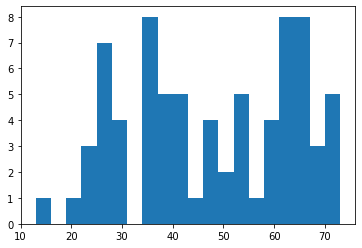

In [10]:
plt.hist([G.degree(n) for n in G.nodes()], bins=20)

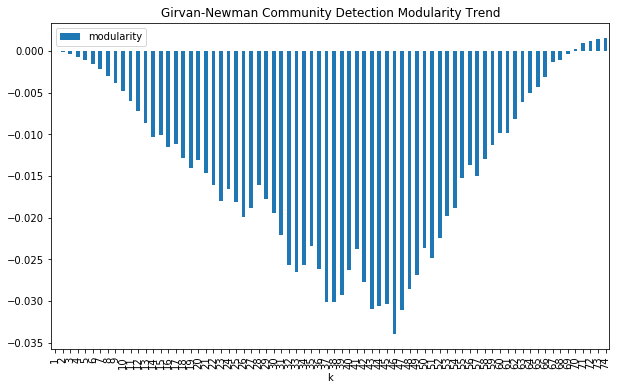

In [2]:
knet.plot_modularity(G)

We want the modularity to be between .3 and .7, so this is very very bad.

### Girvan-Newman community detection

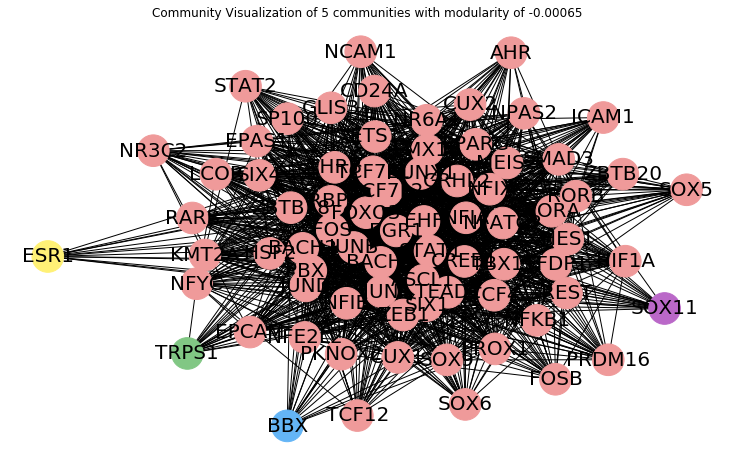

In [5]:
knet.visualize_communities(G,knet.get_girvan_newman_communities(G)[3])

Clearly this network is not very modular. Maybe we should try a different algorithm.

### Leiden

In [ ]:
leiden_communities = knet.get_leiden_communities(G)
knet.visualize_communities(G, list(leiden_communities))

# Updated network (as above) subset to top 8 Regulators

In [3]:
dir_prefix = '/Users/smgroves/Documents/GitHub/multiome-analysis/network-inference-DIRECT-NET'
network_path = 'networks/DIRECT-NET_network_threshold_10_2020db_top8regs.csv'

G_small = knet.load_nx_network(f"{dir_prefix}/{network_path}")
knet.get_graph_info(G_small)

Number of nodes: 75
Number of edges: 511
Available nodes: ['THRB', 'AHR', 'REST', 'FOS', 'BACH1', 'RORB', 'JUNB', 'SIX1', 'JUND', 'STAT1', 'ASCL1', 'TCF7L1', 'ZBTB18', 'TCF7L2', 'TCF4', 'HES1', 'PPARG', 'NFYC', 'HSF2', 'BACH2', 'PBX1', 'ETS1', 'TBX15', 'RORA', 'FOXO3', 'BBX', 'GRHL2', 'PROX1', 'JUN', 'TFDP1', 'CD24A', 'PKNOX2', 'SOX9', 'TEAD1', 'CREB1', 'EGR1', 'LMX1B', 'CUX1', 'NFIB', 'CUX2', 'EHF', 'RUNX1', 'EPAS1', 'EPCAM', 'ESR1', 'NR6A1', 'FOSB', 'GLIS3', 'SMAD3', 'MEIS2', 'HIF1A', 'ICAM1', 'KMT2A', 'LCOR', 'NCAM1', 'NFATC2', 'ZEB1', 'NFE2L2', 'NFIA', 'NFKB1', 'NFIX', 'NPAS2', 'NR3C2', 'RBPJ', 'PRDM16', 'RARB', 'SIX4', 'SOX11', 'SOX5', 'SOX6', 'SP100', 'STAT2', 'TCF12', 'TRPS1', 'ZBTB20']
Connected components: [{'FOSB', 'ZBTB20', 'ICAM1', 'THRB', 'SMAD3', 'TCF7L1', 'EHF', 'TCF7L2', 'RORB', 'NFATC2', 'HSF2', 'SIX4', 'JUNB', 'NR6A1', 'CUX2', 'RBPJ', 'TBX15', 'NCAM1', 'AHR', 'FOS', 'SOX11', 'BBX', 'PPARG', 'HIF1A', 'LMX1B', 'GLIS3', 'LCOR', 'RARB', 'STAT1', 'NFIA', 'MEIS2', 'ESR1', '

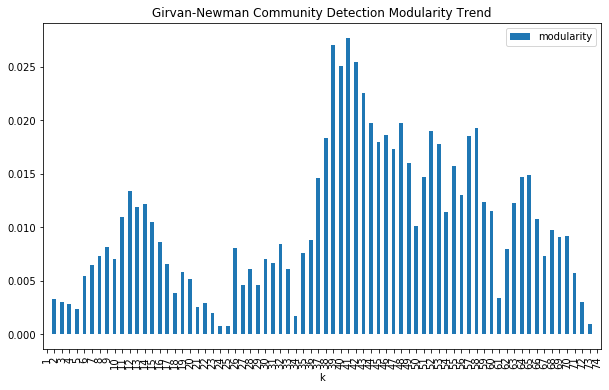

In [12]:
knet.plot_modularity(G_small)

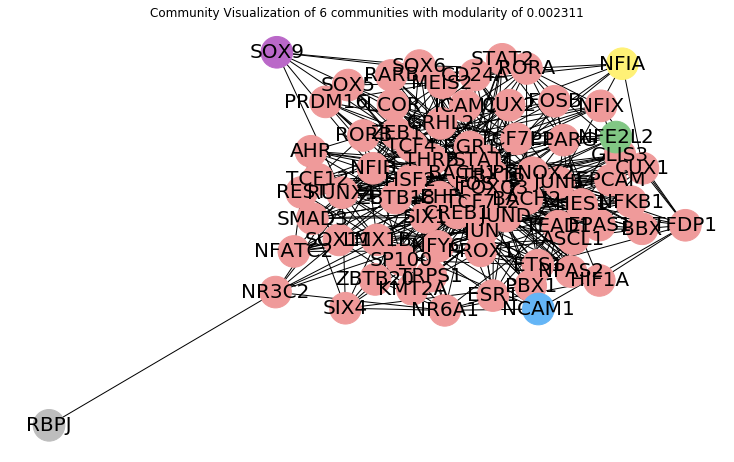

In [15]:
knet.visualize_communities(G,knet.get_girvan_newman_communities(G)[4])


## Updated network with filters: P-value cutoff

In [4]:
network_path = 'networks/DIRECT-NET_network_2020db_pval.csv'

G = knet.load_nx_network(f"{dir_prefix}/{network_path}")
knet.get_graph_info(G)

Number of nodes: 75
Number of edges: 1380
Available nodes: ['ASCL1', 'STAT1', 'SP100', 'FOXO3', 'RARB', 'GRHL2', 'RUNX1', 'TCF7L2', 'NFIB', 'PRDM16', 'REST', 'CUX1', 'TCF7L1', 'TEAD1', 'SMAD3', 'SOX11', 'LCOR', 'CUX2', 'TCF12', 'PBX1', 'HIF1A', 'PPARG', 'ETS1', 'KMT2A', 'ZEB1', 'EGR1', 'RORB', 'LMX1B', 'MEIS2', 'NFATC2', 'SOX6', 'FOS', 'HES1', 'BACH1', 'NFE2L2', 'BACH2', 'FOSB', 'JUNB', 'EPCAM', 'PROX1', 'NPAS2', 'THRB', 'NFKB1', 'AHR', 'EHF', 'SOX5', 'TBX15', 'EPAS1', 'GLIS3', 'JUN', 'ICAM1', 'TRPS1', 'NR6A1', 'NFIX', 'SIX4', 'NCAM1', 'SIX1', 'CD24A', 'ESR1', 'NFIA', 'NR3C2', 'STAT2', 'ZBTB20', 'CREB1', 'HSF2', 'BBX', 'PKNOX2', 'ZBTB7A', 'JUND', 'TCF4', 'RBPJ', 'SOX9', 'TFDP1', 'NFYC', 'RORA']
Connected components: [{'FOSB', 'ZBTB20', 'ICAM1', 'TCF7L2', 'SMAD3', 'TCF7L1', 'RORB', 'NFATC2', 'THRB', 'EHF', 'HSF2', 'SIX4', 'JUNB', 'NR6A1', 'CUX2', 'RBPJ', 'ZBTB7A', 'TBX15', 'NCAM1', 'AHR', 'FOS', 'SOX11', 'HIF1A', 'PPARG', 'LMX1B', 'BBX', 'LCOR', 'GLIS3', 'RARB', 'STAT1', 'NFIA', 'MEIS2'

(array([1., 1., 3., 5., 3., 5., 5., 4., 6., 2., 8., 4., 4., 5., 5., 4., 4.,
        3., 1., 2.]),
 array([ 8.  , 10.85, 13.7 , 16.55, 19.4 , 22.25, 25.1 , 27.95, 30.8 ,
        33.65, 36.5 , 39.35, 42.2 , 45.05, 47.9 , 50.75, 53.6 , 56.45,
        59.3 , 62.15, 65.  ]),
 <a list of 20 Patch objects>)

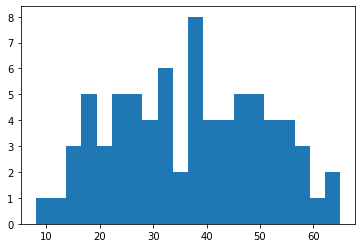

In [5]:
plt.hist([G.degree(n) for n in G.nodes()], bins=20)


## Updated network with filters: P-value cutoff and differentially accessible peaks with accesibility in at least 0.1% of cells

Number of nodes: 72
Number of edges: 922
Available nodes: ['BACH1', 'FOXO3', 'AHR', 'RUNX1', 'EHF', 'NFKB1', 'TCF7L1', 'TEAD1', 'NFIX', 'ZBTB20', 'BBX', 'CUX2', 'PBX1', 'HIF1A', 'NR3C2', 'ETS1', 'KMT2A', 'EGR1', 'LMX1B', 'FOS', 'EPAS1', 'GLIS3', 'NFE2L2', 'BACH2', 'JUN', 'FOSB', 'EPCAM', 'SOX11', 'SP100', 'GRHL2', 'PRDM16', 'SMAD3', 'LCOR', 'RORB', 'MEIS2', 'STAT2', 'JUNB', 'TBX15', 'NFIA', 'CUX1', 'NFATC2', 'NFIB', 'REST', 'HES1', 'ICAM1', 'TCF7L2', 'RARB', 'SOX5', 'PKNOX2', 'SOX9', 'SIX4', 'TCF12', 'SIX1', 'CREB1', 'PPARG', 'HSF2', 'ASCL1', 'NCAM1', 'NR6A1', 'TCF4', 'THRB', 'NPAS2', 'ESR1', 'RBPJ', 'PROX1', 'RORA', 'ZEB1', 'TFDP1', 'STAT1', 'ZBTB7A', 'NFYC', 'JUND']
Connected components: [{'FOSB', 'ZBTB20', 'ICAM1', 'EHF', 'TCF7L1', 'TCF7L2', 'NFATC2', 'THRB', 'RORB', 'SMAD3', 'HSF2', 'SIX4', 'JUNB', 'NR6A1', 'CUX2', 'RBPJ', 'ZBTB7A', 'TBX15', 'NCAM1', 'AHR', 'FOS', 'SOX11', 'BBX', 'HIF1A', 'LMX1B', 'PPARG', 'GLIS3', 'LCOR', 'RARB', 'STAT1', 'NFIA', 'MEIS2', 'ESR1', 'RUNX1', 'ASCL1',

(array([ 2.,  2.,  4.,  1.,  6., 11.,  4.,  2.,  5.,  7.,  3.,  0.,  7.,
         5.,  3.,  2.,  3.,  2.,  2.,  1.]),
 array([ 4.  ,  6.35,  8.7 , 11.05, 13.4 , 15.75, 18.1 , 20.45, 22.8 ,
        25.15, 27.5 , 29.85, 32.2 , 34.55, 36.9 , 39.25, 41.6 , 43.95,
        46.3 , 48.65, 51.  ]),
 <a list of 20 Patch objects>)

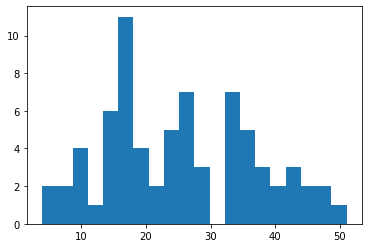

In [5]:
network_path = 'networks/DIRECT-NET_network_2020db_0.1.csv'

G = knet.load_nx_network(f"{dir_prefix}/{network_path}")
knet.get_graph_info(G)
plt.hist([G.degree(n) for n in G.nodes()], bins=20)


## Original network before reduction to 8 regulators per node

Number of nodes: 68
Number of edges: 827
Available nodes: ['REST', 'STAT1', 'SP100', 'FOXO3', 'STAT2', 'RARB', 'RUNX1', 'EHF', 'TEAD1', 'FOS', 'EGR1', 'NFE2L2', 'JUNB', 'SMAD3', 'CUX2', 'NFATC2', 'MEIS2', 'TBX15', 'KMT2A', 'AHR', 'BACH1', 'EPAS1', 'GLIS3', 'CUX1', 'NFIX', 'NFIB', 'NFIA', 'LCOR', 'SOX6', 'PKNOX2', 'PRDM16', 'ESR1', 'THRB', 'GRHL2', 'TCF7L1', 'NFKB1', 'HIF1A', 'RORA', 'NPAS2', 'SOX5', 'BACH2', 'JUN', 'ETS1', 'LMX1B', 'SIX1', 'SIX4', 'PPARG', 'ZBTB20', 'ZEB1', 'NR3C2', 'HSF2', 'FOSB', 'PBX1', 'PROX1', 'RORB', 'TCF12', 'ASCL1', 'SOX9', 'BBX', 'TCF7L2', 'ZBTB7A', 'ZBTB18', 'ARID5B', 'STAT4', 'JUND', 'CREB1', 'MECOM', 'TCF4']
Connected components: [{'FOSB', 'ZBTB20', 'EHF', 'SMAD3', 'NFATC2', 'TCF7L2', 'THRB', 'RORB', 'TCF7L1', 'HSF2', 'SIX4', 'JUNB', 'CUX2', 'TBX15', 'ZBTB7A', 'AHR', 'FOS', 'BBX', 'PPARG', 'LMX1B', 'HIF1A', 'GLIS3', 'LCOR', 'RARB', 'MECOM', 'STAT1', 'NFIA', 'MEIS2', 'ESR1', 'RUNX1', 'ASCL1', 'NFE2L2', 'TEAD1', 'EGR1', 'EPAS1', 'SOX9', 'PKNOX2', 'NFIX', 'TCF

(array([3., 2., 2., 3., 6., 4., 4., 3., 5., 4., 3., 6., 7., 3., 2., 3., 4.,
        2., 0., 2.]),
 array([ 1. ,  3.5,  6. ,  8.5, 11. , 13.5, 16. , 18.5, 21. , 23.5, 26. ,
        28.5, 31. , 33.5, 36. , 38.5, 41. , 43.5, 46. , 48.5, 51. ]),
 <a list of 20 Patch objects>)

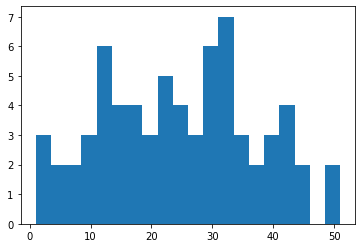

In [6]:
network_path = 'networks/DIRECT-NET_network_with_FIGR_threshold_0_no_NEUROG2.csv'

G = knet.load_nx_network(f"{dir_prefix}/{network_path}")
knet.get_graph_info(G)
plt.hist([G.degree(n) for n in G.nodes()], bins=20)

## Original network expanded

This is after all of the steps we did before, like pruning to the top 8 regulators based on DIRECT NET motif score, removing some sink nodes, and adding in interesting biomarkers like EPCAM

Number of nodes: 54
Number of edges: 339
Available nodes: ['PBX1', 'LMX1B', 'NFIB', 'TEAD1', 'NFKB1', 'NFIX', 'ICAM1', 'REST', 'MEIS2', 'PKNOX2', 'NCAM1', 'CUX1', 'EGR1', 'JUN', 'NFIA', 'PROX1', 'RORB', 'RUNX1', 'SIX1', 'SIX4', 'TBX15', 'JUNB', 'TCF7L2', 'TCF4', 'ASCL1', 'ETS1', 'PPARG', 'ZBTB20', 'SOX11', 'CUX2', 'ESR1', 'FOXO3', 'HSF2', 'KMT2A', 'NFATC2', 'PRDM16', 'RARB', 'SP100', 'TCF12', 'SOX9', 'EPCAM', 'CD44', 'SMAD3', 'GRHL2', 'EHF', 'STAT1', 'ZBTB7A', 'FOS', 'CREB1', 'NR3C2', 'ZEB1', 'JUND', 'ZBTB18', 'RORA']
Connected components: [{'ZBTB20', 'ICAM1', 'EHF', 'NFATC2', 'SMAD3', 'RORB', 'TCF7L2', 'HSF2', 'SIX4', 'CD44', 'JUNB', 'CUX2', 'TBX15', 'ZBTB7A', 'NCAM1', 'FOS', 'SOX11', 'LMX1B', 'PPARG', 'RARB', 'STAT1', 'NFIA', 'MEIS2', 'ESR1', 'RUNX1', 'ASCL1', 'TEAD1', 'EGR1', 'SOX9', 'PKNOX2', 'NFIX', 'TCF4', 'NR3C2', 'PRDM16', 'JUND', 'ZBTB18', 'RORA', 'KMT2A', 'CUX1', 'EPCAM', 'GRHL2', 'ETS1', 'NFIB', 'NFKB1', 'PBX1', 'SIX1', 'REST', 'ZEB1', 'PROX1', 'JUN', 'FOXO3', 'TCF12', 'CREB

(array([ 3.,  4.,  1.,  1., 11.,  5.,  3.,  2.,  7.,  2.,  2.,  0.,  6.,
         1.,  0.,  1.,  2.,  1.,  1.,  1.]),
 array([ 3.  ,  4.25,  5.5 ,  6.75,  8.  ,  9.25, 10.5 , 11.75, 13.  ,
        14.25, 15.5 , 16.75, 18.  , 19.25, 20.5 , 21.75, 23.  , 24.25,
        25.5 , 26.75, 28.  ]),
 <a list of 20 Patch objects>)

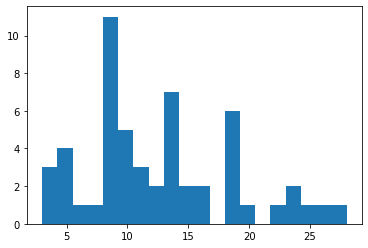

In [7]:
network_path = 'networks/DIRECT-NET_network_with_FIGR_threshold_0_no_NEUROG2_top8regs_expanded_v2.csv'

G = knet.load_nx_network(f"{dir_prefix}/{network_path}")
knet.get_graph_info(G)
plt.hist([G.degree(n) for n in G.nodes()], bins=20)

Okay, so it seems like the old network before pruning is pretty similar to the network from the 0.1% cutoff. So we should be able to use that new network for our analysis. To prune it, we may want to go a different way than just pruning based on DIRECT NET motif score though.

## Further analysis with the 0.1% cutoff network

In [8]:
network_path = 'networks/DIRECT-NET_network_2020db_0.1.csv'

G = knet.load_nx_network(f"{dir_prefix}/{network_path}")
knet.get_graph_info(G)

Number of nodes: 72
Number of edges: 922
Available nodes: ['BACH1', 'FOXO3', 'AHR', 'RUNX1', 'EHF', 'NFKB1', 'TCF7L1', 'TEAD1', 'NFIX', 'ZBTB20', 'BBX', 'CUX2', 'PBX1', 'HIF1A', 'NR3C2', 'ETS1', 'KMT2A', 'EGR1', 'LMX1B', 'FOS', 'EPAS1', 'GLIS3', 'NFE2L2', 'BACH2', 'JUN', 'FOSB', 'EPCAM', 'SOX11', 'SP100', 'GRHL2', 'PRDM16', 'SMAD3', 'LCOR', 'RORB', 'MEIS2', 'STAT2', 'JUNB', 'TBX15', 'NFIA', 'CUX1', 'NFATC2', 'NFIB', 'REST', 'HES1', 'ICAM1', 'TCF7L2', 'RARB', 'SOX5', 'PKNOX2', 'SOX9', 'SIX4', 'TCF12', 'SIX1', 'CREB1', 'PPARG', 'HSF2', 'ASCL1', 'NCAM1', 'NR6A1', 'TCF4', 'THRB', 'NPAS2', 'ESR1', 'RBPJ', 'PROX1', 'RORA', 'ZEB1', 'TFDP1', 'STAT1', 'ZBTB7A', 'NFYC', 'JUND']
Connected components: [{'FOSB', 'ZBTB20', 'ICAM1', 'EHF', 'TCF7L1', 'TCF7L2', 'NFATC2', 'THRB', 'RORB', 'SMAD3', 'HSF2', 'SIX4', 'JUNB', 'NR6A1', 'CUX2', 'RBPJ', 'ZBTB7A', 'TBX15', 'NCAM1', 'AHR', 'FOS', 'SOX11', 'BBX', 'HIF1A', 'LMX1B', 'PPARG', 'GLIS3', 'LCOR', 'RARB', 'STAT1', 'NFIA', 'MEIS2', 'ESR1', 'RUNX1', 'ASCL1',

In [9]:
network_path = 'networks/DIRECT-NET_network_2020db_0.1_top8regs.csv'

G_small = knet.load_nx_network(f"{dir_prefix}/{network_path}")
knet.get_graph_info(G_small)

Number of nodes: 72
Number of edges: 431
Available nodes: ['BACH1', 'AHR', 'REST', 'FOS', 'RORB', 'JUNB', 'EHF', 'JUND', 'RBPJ', 'STAT1', 'ASCL1', 'HES1', 'PPARG', 'SIX1', 'CREB1', 'TEAD1', 'TCF7L2', 'ETS1', 'LMX1B', 'BACH2', 'THRB', 'RORA', 'RUNX1', 'BBX', 'GRHL2', 'JUN', 'CUX1', 'MEIS2', 'NR6A1', 'EGR1', 'CUX2', 'NFIB', 'ZBTB7A', 'FOXO3', 'NFATC2', 'NR3C2', 'EPAS1', 'TBX15', 'PBX1', 'NFYC', 'ZEB1', 'EPCAM', 'TCF4', 'HSF2', 'NFIA', 'FOSB', 'TCF7L1', 'TFDP1', 'GLIS3', 'PROX1', 'HIF1A', 'ICAM1', 'SMAD3', 'KMT2A', 'LCOR', 'NCAM1', 'NFIX', 'NFE2L2', 'NFKB1', 'NPAS2', 'PKNOX2', 'PRDM16', 'RARB', 'SIX4', 'SOX11', 'SOX5', 'SP100', 'STAT2', 'ESR1', 'TCF12', 'SOX9', 'ZBTB20']
Connected components: [{'FOSB', 'ZBTB20', 'ICAM1', 'TCF7L2', 'EHF', 'NFATC2', 'TCF7L1', 'THRB', 'SMAD3', 'RORB', 'HSF2', 'SIX4', 'JUNB', 'NR6A1', 'CUX2', 'RBPJ', 'TBX15', 'NCAM1', 'ZBTB7A', 'AHR', 'FOS', 'SOX11', 'HIF1A', 'LMX1B', 'BBX', 'PPARG', 'GLIS3', 'LCOR', 'RARB', 'STAT1', 'NFIA', 'MEIS2', 'ESR1', 'RUNX1', 'ASCL1',

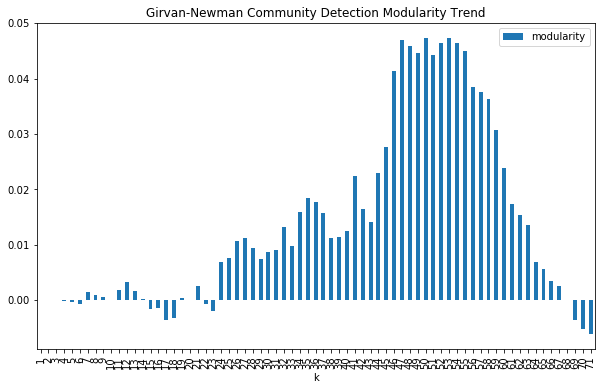

In [10]:
knet.plot_modularity(G_small)


Still not very modular

In [3]:
graph, vertex_dict = bb.load_network(f"{dir_prefix}/networks/DIRECT-NET_network_2020db_0.1_top8regs.csv",remove_sinks=False, remove_sources=False, remove_selfloops=False)
v_names, nodes = bb.utils.get_nodes(vertex_dict, graph)

bb.print_graph_info(graph, vertex_dict, nodes, fname = '', plot = False, add_edge_weights=False)

Graph properties
<Graph object, directed, with 72 vertices and 455 edges, 3 internal vertex properties, at 0x7fca880f6050>
Number of nodes: 72
Nodes:  ['AHR', 'ASCL1', 'BACH1', 'BACH2', 'BBX', 'CREB1', 'CUX1', 'CUX2', 'EGR1', 'EHF', 'EPAS1', 'EPCAM', 'ESR1', 'ETS1', 'FOS', 'FOSB', 'FOXO3', 'GLIS3', 'GRHL2', 'HES1', 'HIF1A', 'HSF2', 'ICAM1', 'JUN', 'JUNB', 'JUND', 'KMT2A', 'LCOR', 'LMX1B', 'MEIS2', 'NCAM1', 'NFATC2', 'NFE2L2', 'NFIA', 'NFIB', 'NFIX', 'NFKB1', 'NFYC', 'NPAS2', 'NR3C2', 'NR6A1', 'PBX1', 'PKNOX2', 'PPARG', 'PRDM16', 'PROX1', 'RARB', 'RBPJ', 'REST', 'RORA', 'RORB', 'RUNX1', 'SIX1', 'SIX4', 'SMAD3', 'SOX11', 'SOX5', 'SOX9', 'SP100', 'STAT1', 'STAT2', 'TBX15', 'TCF12', 'TCF4', 'TCF7L1', 'TCF7L2', 'TEAD1', 'TFDP1', 'THRB', 'ZBTB20', 'ZBTB7A', 'ZEB1']
Sources:  13 ['RBPJ', 'NR6A1', 'RORA', 'NFYC', 'STAT1', 'ESR1', 'JUND', 'SOX9', 'CREB1', 'TCF4', 'TFDP1', 'ZBTB7A', 'ZEB1']
Sinks:  22 ['STAT2', 'EPAS1', 'SOX11', 'SOX5', 'BBX', 'ICAM1', 'SIX4', 'NCAM1', 'ZBTB20', 'SP100', 'PKNOX2

In [16]:
#compare to old network
graph, vertex_dict = bb.load_network(f"{dir_prefix}/networks/DIRECT-NET_network_with_FIGR_threshold_0_no_NEUROG2_top8regs_expanded_v2.csv",remove_sinks=False, remove_sources=False, remove_selfloops=False)

v_names, nodes = bb.utils.get_nodes(vertex_dict, graph)

bb.print_graph_info(graph, vertex_dict, nodes, fname = '', plot = False, add_edge_weights=False)

Graph properties
<Graph object, directed, with 54 vertices and 360 edges, 3 internal vertex properties, at 0x7fa998857fd0>
Number of nodes: 54
Nodes:  ['ASCL1', 'CD44', 'CREB1', 'CUX1', 'CUX2', 'EGR1', 'EHF', 'EPCAM', 'ESR1', 'ETS1', 'FOS', 'FOXO3', 'GRHL2', 'HSF2', 'ICAM1', 'JUN', 'JUNB', 'JUND', 'KMT2A', 'LMX1B', 'MEIS2', 'NCAM1', 'NFATC2', 'NFIA', 'NFIB', 'NFIX', 'NFKB1', 'NR3C2', 'PBX1', 'PKNOX2', 'PPARG', 'PRDM16', 'PROX1', 'RARB', 'REST', 'RORA', 'RORB', 'RUNX1', 'SIX1', 'SIX4', 'SMAD3', 'SOX11', 'SOX9', 'SP100', 'STAT1', 'TBX15', 'TCF12', 'TCF4', 'TCF7L2', 'TEAD1', 'ZBTB18', 'ZBTB20', 'ZBTB7A', 'ZEB1']
Sources:  6 ['ZBTB7A', 'SOX9', 'TCF4', 'ZBTB18', 'RORA', 'REST']
Sinks:  9 ['ICAM1', 'ZBTB20', 'CD44', 'NCAM1', 'SOX11', 'LMX1B', 'KMT2A', 'EPCAM', 'TCF12']
Network is a single connected component:  True
Directed acyclic graph:  False


In [4]:
graph, vertex_dict = bb.load_network(f"{dir_prefix}/networks/DIRECT-NET_network_2020db_0.1.csv",remove_sinks=False, remove_sources=False, remove_selfloops=False)
v_names, nodes = bb.utils.get_nodes(vertex_dict, graph)

bb.print_graph_info(graph, vertex_dict, nodes, fname = '', plot = False, add_edge_weights=False)

Graph properties
<Graph object, directed, with 72 vertices and 1017 edges, 3 internal vertex properties, at 0x7fcada05bc10>
Number of nodes: 72
Nodes:  ['AHR', 'ASCL1', 'BACH1', 'BACH2', 'BBX', 'CREB1', 'CUX1', 'CUX2', 'EGR1', 'EHF', 'EPAS1', 'EPCAM', 'ESR1', 'ETS1', 'FOS', 'FOSB', 'FOXO3', 'GLIS3', 'GRHL2', 'HES1', 'HIF1A', 'HSF2', 'ICAM1', 'JUN', 'JUNB', 'JUND', 'KMT2A', 'LCOR', 'LMX1B', 'MEIS2', 'NCAM1', 'NFATC2', 'NFE2L2', 'NFIA', 'NFIB', 'NFIX', 'NFKB1', 'NFYC', 'NPAS2', 'NR3C2', 'NR6A1', 'PBX1', 'PKNOX2', 'PPARG', 'PRDM16', 'PROX1', 'RARB', 'RBPJ', 'REST', 'RORA', 'RORB', 'RUNX1', 'SIX1', 'SIX4', 'SMAD3', 'SOX11', 'SOX5', 'SOX9', 'SP100', 'STAT1', 'STAT2', 'TBX15', 'TCF12', 'TCF4', 'TCF7L1', 'TCF7L2', 'TEAD1', 'TFDP1', 'THRB', 'ZBTB20', 'ZBTB7A', 'ZEB1']
Sources:  13 ['RBPJ', 'NR6A1', 'RORA', 'NFYC', 'STAT1', 'ESR1', 'SOX9', 'JUND', 'CREB1', 'TCF4', 'TFDP1', 'ZBTB7A', 'ZEB1']
Sinks:  20 ['STAT2', 'EPAS1', 'SOX11', 'SOX5', 'BBX', 'ICAM1', 'SIX4', 'NCAM1', 'ZBTB20', 'SP100', 'FOSB'

In [6]:
graph, vertex_dict = bb.load_network(f"{dir_prefix}/networks/DIRECT-NET_network_2020db_pval.csv",remove_sinks=False, remove_sources=False, remove_selfloops=False)
v_names, nodes = bb.utils.get_nodes(vertex_dict, graph)

bb.print_graph_info(graph, vertex_dict, nodes, fname = '', plot = False, add_edge_weights=False)

Graph properties
<Graph object, directed, with 75 vertices and 1585 edges, 3 internal vertex properties, at 0x7fcada060c90>
Number of nodes: 75
Nodes:  ['AHR', 'ASCL1', 'BACH1', 'BACH2', 'BBX', 'CD24A', 'CREB1', 'CUX1', 'CUX2', 'EGR1', 'EHF', 'EPAS1', 'EPCAM', 'ESR1', 'ETS1', 'FOS', 'FOSB', 'FOXO3', 'GLIS3', 'GRHL2', 'HES1', 'HIF1A', 'HSF2', 'ICAM1', 'JUN', 'JUNB', 'JUND', 'KMT2A', 'LCOR', 'LMX1B', 'MEIS2', 'NCAM1', 'NFATC2', 'NFE2L2', 'NFIA', 'NFIB', 'NFIX', 'NFKB1', 'NFYC', 'NPAS2', 'NR3C2', 'NR6A1', 'PBX1', 'PKNOX2', 'PPARG', 'PRDM16', 'PROX1', 'RARB', 'RBPJ', 'REST', 'RORA', 'RORB', 'RUNX1', 'SIX1', 'SIX4', 'SMAD3', 'SOX11', 'SOX5', 'SOX6', 'SOX9', 'SP100', 'STAT1', 'STAT2', 'TBX15', 'TCF12', 'TCF4', 'TCF7L1', 'TCF7L2', 'TEAD1', 'TFDP1', 'THRB', 'TRPS1', 'ZBTB20', 'ZBTB7A', 'ZEB1']
Sources:  9 ['RBPJ', 'NR6A1', 'RORA', 'NFYC', 'SOX9', 'JUND', 'TCF4', 'TFDP1', 'ZBTB7A']
Sinks:  23 ['STAT2', 'SOX6', 'EPAS1', 'TRPS1', 'SOX11', 'SOX5', 'ICAM1', 'BBX', 'SIX4', 'NCAM1', 'ZBTB20', 'SP100'